In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn import datasets

In [11]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [12]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [1]:
# Support Vector Classification

from sklearn.svm import SVC


In [2]:
model = SVC()

In [7]:
from sklearn.cross_validation import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [26]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
from sklearn import metrics

In [28]:
predicted = model.predict(X_test)

In [29]:
expected = Y_test

In [30]:
print(metrics.accuracy_score(expected,predicted))

0.9666666666666667


In [31]:
from sklearn import svm

In [32]:
X = iris.data[:,:2]

Y = iris.target

In [33]:
# Pass SVM Regularization paratmeter

C = 1.0

In [34]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [38]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [39]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [40]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [44]:
h = 0.02

x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

In [46]:
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [47]:
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [49]:
titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

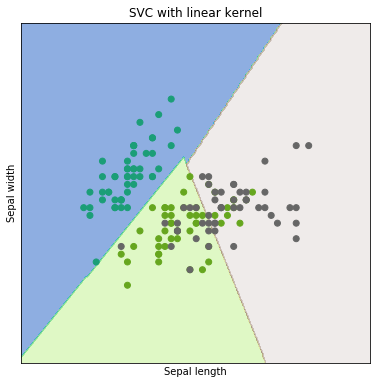

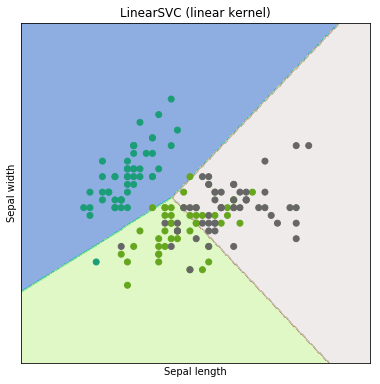

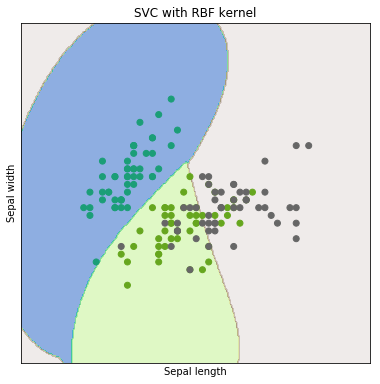

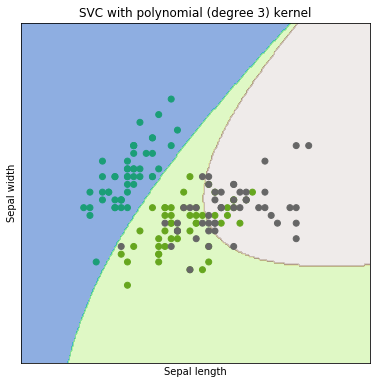

In [52]:
# For loop

for i,clf in enumerate((svc, lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    